# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction
### Notebook 2: Preprocessing and Exploratory Data Analysis (EDA)


Authors: Muhammed K. Ç., Karsanth P., Andrea V.


# 1. Part: Data Preprocessing and Cleaning

### 1.1 Global Set Up and Importing Data

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install -U fastapi kaleido python-multipart uvicorn

In [ ]:
!pip install pandas-profiling==3.6.0

In [ ]:
!pip install --upgrade typing-extensions

In [ ]:
!pip install plotly --upgrade

In [ ]:
!pip install plotnine

In [ ]:
from google.colab import drive
import os
from pathlib import Path
import spacy
import pandas as pd
import pandas_profiling as prof
import numpy as np
import re
import string
from gensim.parsing.preprocessing import STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
import difflib
import nltk
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
from textblob import TextBlob
import datetime
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.subplots as sp
from plotly.subplots import make_subplots
from plotly.offline import plot
from IPython.display import display, HTML


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Check your current working directory. You can also use '!pwd'
cwd = os.getcwd()
cwd

'/content'

In [ ]:
# Using pathlib module
print(Path.cwd())

/content


In [ ]:
# Create a Path object that points towards the directory 'data' and assign
# the object to the variable 'data_folder'
data_folder = Path("/Project_Notebooks")

cleantec = data_folder / "cleantech_media_dataset_v1_20231109.csv"

In [ ]:
print(data_folder)
print(cleantec)
cleantec

The encoding argument takes a string as its input: we pass utf-8 to the argument to declare that the plain text is encoded in UTF-8.

Moreover, we use the mode argument to define that we only want to open the file for reading, which is done by passing the string r to the argument.

In [ ]:
df = pd.read_csv(cleantec, encoding='utf-8')
df.head()

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  
0  https://www.energyintel.com/0000017b-a7dc-de4c...  
1  https://www.energyintel.com/0000017b-a7dc-de4c...  
2  https://www.energyintel.com/0000017b-a7dc-de4c...  
3  https://www.energyintel.com/0000017b-a7dc-de4c...  
4  https://www.energyintel.com/0000017b-a7dc-de4c...

In [ ]:
df.shape

(9607, 7)

### 1.2 String Operations / Cleaning

In [ ]:
# Make all text lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head()

Unnamed: 0                                              title        date  \
0        1280  qatar to slash emissions as lng expansion adva...  2021-01-13   
1        1281               india launches its first 700 mw phwr  2021-01-15   
2        1283              new chapter for us-china energy trade  2021-01-20   
3        1284  japan: slow restarts cast doubt on 2030 energy...  2021-01-22   
4        1285     nyc pension funds to divest fossil fuel shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["qatar petroleum ( qp) is targeting aggressiv...  energyintel   
1    NaN  ["• nuclear power corp. of india ltd. ( npcil)...  energyintel   
2    NaN  ["new us president joe biden took office this ...  energyintel   
3    NaN  ["the slow pace of japanese reactor restarts c...  energyintel   
4    NaN  ["two of new york city's largest pension funds...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   
1  https://www.energyintel.com/0000017b-a7dc-de4c...   
2  https://www.energyintel.com/0000017b-a7dc-de4c...   
3  https://www.energyintel.com/0000017b-a7dc-de4c...   
4  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                        tokens_title  \
0  [qatar, to, slash, emissions, as, lng, expansi...   
1       [india, launches, its, first, 700, mw, phwr]   
2   [new, chapter, for, us, -, china, energy, trade]   
3  [japan, :, slow, restarts, cast, doubt, on, 20...   
4  [nyc, pension, funds, to, divest, fossil, fuel...   

                                      tokens_content  
0  [[, ", qatar, petroleum, (, qp, ), is, targeti...  
1  [[, ", •, nuclear, power, corp., of, india, lt...  
2  [[, ", new, us, president, joe, biden, took, o...  
3  [[, ", the, slow, pace, of, japanese, reactor,...  
4  [[, ", two, of, new, york, city, 's, largest, ...

In [ ]:
# Define a function to remove special characters from title and content
def remove_special_chars(text):
    return ''.join(char for char in text if char not in string.punctuation)

# Apply the function to 'remove_special_chars' and create a new columns
df['title_cleaned'] = df['title'].apply(remove_special_chars)
df['content_cleaned'] = df['content'].apply(remove_special_chars)

df.head()

Unnamed: 0                                              title        date  \
0        1280  qatar to slash emissions as lng expansion adva...  2021-01-13   
1        1281               india launches its first 700 mw phwr  2021-01-15   
2        1283              new chapter for us-china energy trade  2021-01-20   
3        1284  japan: slow restarts cast doubt on 2030 energy...  2021-01-22   
4        1285     nyc pension funds to divest fossil fuel shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["qatar petroleum ( qp) is targeting aggressiv...  energyintel   
1    NaN  ["• nuclear power corp. of india ltd. ( npcil)...  energyintel   
2    NaN  ["new us president joe biden took office this ...  energyintel   
3    NaN  ["the slow pace of japanese reactor restarts c...  energyintel   
4    NaN  ["two of new york city's largest pension funds...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   
1  https://www.energyintel.com/0000017b-a7dc-de4c...   
2  https://www.energyintel.com/0000017b-a7dc-de4c...   
3  https://www.energyintel.com/0000017b-a7dc-de4c...   
4  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                        tokens_title  \
0  [qatar, to, slash, emissions, as, lng, expansi...   
1       [india, launches, its, first, 700, mw, phwr]   
2   [new, chapter, for, us, -, china, energy, trade]   
3  [japan, :, slow, restarts, cast, doubt, on, 20...   
4  [nyc, pension, funds, to, divest, fossil, fuel...   

                                      tokens_content  \
0  [[, ", qatar, petroleum, (, qp, ), is, targeti...   
1  [[, ", •, nuclear, power, corp., of, india, lt...   
2  [[, ", new, us, president, joe, biden, took, o...   
3  [[, ", the, slow, pace, of, japanese, reactor,...   
4  [[, ", two, of, new, york, city, 's, largest, ...   

                                       title_cleaned  \
0  qatar to slash emissions as lng expansion adva...   
1               india launches its first 700 mw phwr   
2               new chapter for uschina energy trade   
3  japan slow restarts cast doubt on 2030 energy ...   
4     nyc pension funds to divest fossil fuel shares   

                                     content_cleaned  
0  qatar petroleum  qp is targeting aggressive cu...  
1  • nuclear power corp of india ltd  npcil synch...  
2  new us president joe biden took office this we...  
3  the slow pace of japanese reactor restarts con...  
4  two of new york citys largest pension funds sa...

In [ ]:
# Define a function to remove non-alphanumeric characters from columns title and content
def remove_non_alphanumeric(text):
    return ''.join(char for char in text if char.isalnum() or char.isspace())

# Apply the function to the specific column and update the existing column
df['content_cleaned'] = df['content_cleaned'].apply(remove_non_alphanumeric)
df['title_cleaned'] = df['title_cleaned'].apply(remove_non_alphanumeric)

df.head()

Unnamed: 0                                              title        date  \
0        1280  qatar to slash emissions as lng expansion adva...  2021-01-13   
1        1281               india launches its first 700 mw phwr  2021-01-15   
2        1283              new chapter for us-china energy trade  2021-01-20   
3        1284  japan: slow restarts cast doubt on 2030 energy...  2021-01-22   
4        1285     nyc pension funds to divest fossil fuel shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["qatar petroleum ( qp) is targeting aggressiv...  energyintel   
1    NaN  ["• nuclear power corp. of india ltd. ( npcil)...  energyintel   
2    NaN  ["new us president joe biden took office this ...  energyintel   
3    NaN  ["the slow pace of japanese reactor restarts c...  energyintel   
4    NaN  ["two of new york city's largest pension funds...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   
1  https://www.energyintel.com/0000017b-a7dc-de4c...   
2  https://www.energyintel.com/0000017b-a7dc-de4c...   
3  https://www.energyintel.com/0000017b-a7dc-de4c...   
4  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                        tokens_title  \
0  [qatar, to, slash, emissions, as, lng, expansi...   
1       [india, launches, its, first, 700, mw, phwr]   
2   [new, chapter, for, us, -, china, energy, trade]   
3  [japan, :, slow, restarts, cast, doubt, on, 20...   
4  [nyc, pension, funds, to, divest, fossil, fuel...   

                                      tokens_content  \
0  [[, ", qatar, petroleum, (, qp, ), is, targeti...   
1  [[, ", •, nuclear, power, corp., of, india, lt...   
2  [[, ", new, us, president, joe, biden, took, o...   
3  [[, ", the, slow, pace, of, japanese, reactor,...   
4  [[, ", two, of, new, york, city, 's, largest, ...   

                                       title_cleaned  \
0  qatar to slash emissions as lng expansion adva...   
1               india launches its first 700 mw phwr   
2               new chapter for uschina energy trade   
3  japan slow restarts cast doubt on 2030 energy ...   
4     nyc pension funds to divest fossil fuel shares   

                                     content_cleaned  
0  qatar petroleum  qp is targeting aggressive cu...  
1   nuclear power corp of india ltd  npcil synchr...  
2  new us president joe biden took office this we...  
3  the slow pace of japanese reactor restarts con...  
4  two of new york citys largest pension funds sa...

### 1.3 Tokenize Words and Sentences

In this below section we are adding additionla columns withh tokenization of words and sentences.

In [ ]:
# Tokenize words and remove stopwords using re.findall and gensim STOPWORDS

# Define the gensim stopwords
stop_words_gensim = STOPWORDS

def word_tokenize_stopwords(text):
    re_tokens = re.findall(r'[\w]+', text)
    filtered_gensim = [word for word in re_tokens if word.lower() not in stop_words_gensim]
    return ' '.join(filtered_gensim)

# Apply the function to the 'title' and 'content' columns and create a new columns
df['content_filtered_wordtokenized'] = df['content_cleaned'].apply(lambda x: word_tokenize_stopwords(x))
df['title_filtered_wordtokenized'] = df['title_cleaned'].apply(lambda x: word_tokenize_stopwords(x))

# Showing only the new columns
df.iloc[:, 9:].head(11)

content_filtered_wordtokenized  \
0   qatar petroleum qp targeting aggressive cuts g...   
1   nuclear power corp india npcil synchronized ka...   
2   new president joe biden took office week uschi...   
3   slow pace japanese reactor restarts continues ...   
4   new york citys largest pension funds divest ro...   
5   japans supreme court likely arbiter judicial s...   
6   oil natural gas industry officials looking sea...   
7   new great game emerging energy business rising...   
8   close 10th anniversary fukushima daiichi disas...   
9   coldest weather generation brought widespread ...   
10  taiwan power taipower retiring 985 megawatt ku...   

                         title_filtered_wordtokenized  
0        qatar slash emissions lng expansion advances  
1                          india launches 700 mw phwr  
2                    new chapter uschina energy trade  
3     japan slow restarts cast doubt 2030 energy plan  
4         nyc pension funds divest fossil fuel shares  
5   japan supreme court likely decide fukushima li...  
6      biden appointees signal progressive engagement  
7                          big picture new great game  
8          japan tritium release plans fukushima hold  
9   united states cold snap highlights electrifica...  
10           taiwan kuosheng1 headed early retirement

When tokenizing sentences, we begin with the original data. After tokenization, we remove both punctuation and non-alphanumeric characters. These steps are taken in this order because some of these characters serve as sentence boundaries.

In [ ]:
# Tokenize sentences and remove stopwords using re.compile and gensim remove_stopwords


# Define a function to tokenize sentences and remove stopwords
def sent_tokenize_stopwords(text):
    sentences = re.compile('[.?!]').split(text)
    filtered_sentences = ' '.join([remove_stopwords(sentence) for sentence in sentences])
    return filtered_sentences

# Apply the function to the 'title' and 'content' columns and create a new columns
df['content_filtered_sentokenized'] = df['content'].apply(sent_tokenize_stopwords)
df['title_filtered_sentokenized'] = df['title'].apply(sent_tokenize_stopwords)

# Apply the function to 'remove_special_chars' update the existing column
df['content_filtered_sentokenized'] = df['content_filtered_sentokenized'].apply(remove_special_chars)
df['title_filtered_sentokenized'] = df['title_filtered_sentokenized'].apply(remove_special_chars)

# Apply the function 'remove_non_alphanumeric' update the existing column
df['content_filtered_sentokenized'] = df['content_filtered_sentokenized'].apply(remove_non_alphanumeric)
df['title_filtered_sentokenized'] = df['title_filtered_sentokenized'].apply(remove_non_alphanumeric)

# Showing only the new columns
df.iloc[:, 9:].head(11)

content_filtered_wordtokenized  \
0   qatar petroleum qp targeting aggressive cuts g...   
1   nuclear power corp india npcil synchronized ka...   
2   new president joe biden took office week uschi...   
3   slow pace japanese reactor restarts continues ...   
4   new york citys largest pension funds divest ro...   
5   japans supreme court likely arbiter judicial s...   
6   oil natural gas industry officials looking sea...   
7   new great game emerging energy business rising...   
8   close 10th anniversary fukushima daiichi disas...   
9   coldest weather generation brought widespread ...   
10  taiwan power taipower retiring 985 megawatt ku...   

                         title_filtered_wordtokenized  \
0        qatar slash emissions lng expansion advances   
1                          india launches 700 mw phwr   
2                    new chapter uschina energy trade   
3     japan slow restarts cast doubt 2030 energy plan   
4         nyc pension funds divest fossil fuel shares   
5   japan supreme court likely decide fukushima li...   
6      biden appointees signal progressive engagement   
7                          big picture new great game   
8          japan tritium release plans fukushima hold   
9   united states cold snap highlights electrifica...   
10           taiwan kuosheng1 headed early retirement   

                        content_filtered_sentokenized  \
0   qatar petroleum  qp targeting aggressive cuts ...   
1    nuclear power corp india  npcil synchronized ...   
2   new president joe biden took office week uschi...   
3   the slow pace japanese reactor restarts contin...   
4   two new york citys largest pension funds dives...   
5   japans supreme court likely arbiter judicial s...   
6   oil natural gas industry officials looking sea...   
7    new  great game  emerging energy business ris...   
8   close 10th anniversary fukushima daiichi disas...   
9   as coldest weather generation brought widespre...   
10  taiwan power  taipower retiring 985 megawatt k...   

                          title_filtered_sentokenized  
0        qatar slash emissions lng expansion advances  
1                          india launches 700 mw phwr  
2                    new chapter uschina energy trade  
3     japan slow restarts cast doubt 2030 energy plan  
4         nyc pension funds divest fossil fuel shares  
5   japan supreme court likely decide fukushima li...  
6      biden appointees signal progressive engagement  
7                         big picture new great game   
8          japan tritium release plans fukushima hold  
9   united states cold snap highlights electrifica...  
10           taiwan kuosheng1 headed early retirement

In [ ]:
df['content_filtered_sentokenized'][1]

' nuclear power corp india  npcil synchronized kakrapar3 western state gujarat grid jan 10 making indias 700 megawatt indigenously developed pressurized heavy water reactors  phwrs reach milestone  niw sep 1820 news tweeted anil kakodkar chairman department atomic energy said 15 units design follow currently construction  kakrapar npcils rajasthan plant followed greenfield gorakhpur site haryana planned 10unit fleet gorakhpur sites kakrapar3 years past 2015 completion date achieving criticality july 2020 10 years construction began commercial operations slated begin march according npcils website deadline likely met indias nuclear suppliers feeling relief kakrapar3s startup order flows depend quickly npcil projects moving course covid19 pandemic  niw dec 1120  inaugural small modular reactor  smr project moved second phase fluor nuscale subsidiary announcing jan 11 agreements utah associated municipal power systems  uamps  develop higher maturity cost estimates initial project planning

In [ ]:
# Create a column with the difference in words between word and sentence tokenized words

def word_difference(text1, text2):
    d = difflib.Differ()
    diff = list(d.compare(text1.split(), text2.split()))
    added_words = ' '.join([word[2:] for word in diff if word.startswith('+ ')])
    return added_words

# Apply the word_difference function to create a new column
df['title_diff'] = df.apply(lambda row: word_difference(row['title_filtered_wordtokenized'], row['title_filtered_sentokenized']), axis=1)
df['content_diff'] = df.apply(lambda row: word_difference(row['content_filtered_wordtokenized'], row['content_filtered_sentokenized']), axis=1)

# Showing only the new columns
#df.iloc[:, 12:].head(11)

# Printing difference of columns in a list
print(df['title_diff'].str.split().explode().dropna().tolist())
print(df['content_diff'].str.split().explode().dropna().tolist())

['take', 'a', 'a', 'does', 'does', '1', '23m', 'fire', 'there', 'it', 'well', 'it', '3', '6bn', 'in', 'most', 'us', '4', '2m', '7', '4billion', 'may', '51', '4m', '5', '7m', '1', '5bn', 'there', '2', '0', '1', '5gw', '1', '46bn', '3', '5m', '3', '6m', 'it', 'else', 'out', 'it', '3', '3m', '2', '5m', '2', '5bn', '13', '6bn', 'not', '1', '2bn', 'first', '1', '6gw', '2', '9tn', 'don', 'e', 'go', 'one', 'it', 'on', '2', '8bn', 'first', '9', '5', '1', '5bn', '5', '5m', '3', '8bn', '9', '3m', '12', '3m', '3', '5bn', '10', '5m', 'system', '4', '1m', 'over', 'out', 'its', 'it', '1', '5m', 'call', '1', '10', '1', 'don', 'u', 's', 'about', 'somehow', 'up', 'u', 's', '2', '4', 'its', 'its', 'system', 'be', '46', '1', 'again', 'cant', 'to', 'u', 's', 'level', '2', '7', '5', 'its', 're', 're', 'cant', '2', '8', '59', '4', 'well', '22', '4', 'up', 'down', '26', '5', 'its', 'u', 's', '24', '4', 'in', 'u', 's', 'u', 's', 'u', 's', 'on', 'us', '4', '5', 'u', 's', 'us', '2', '9', 'cant', 'its', 'us', 'n

### 1.4 Lemmatization

In [ ]:
# Lemmatization with nltk and pos_tag to recognize different tenses at verbs

# Download required nltk resources
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

# Define a lemmatizer and tag mapping
nltk_lemmatizer = WordNetLemmatizer()
tag_map_nltk = defaultdict(lambda: wn.NOUN)
tag_map_nltk['J'] = wn.ADJ
tag_map_nltk['V'] = wn.VERB
tag_map_nltk['R'] = wn.ADV

# Function to lemmatize a string of tokens
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = pos_tag(tokens)
    nltk_lemmas = [nltk_lemmatizer.lemmatize(token, tag_map_nltk[tag[0]]) for token, tag in pos_tags]
    return ' '.join(nltk_lemmas)

# Apply lemmatization to all tokenized columns and save the output in new columns
df['title_lemmatized_word'] = df['title_filtered_wordtokenized'].apply(lemmatize_text)
df['content_lemmatized_word'] = df['content_filtered_wordtokenized'].apply(lemmatize_text)
df['title_lemmatized_sent'] = df['title_filtered_sentokenized'].apply(lemmatize_text)
df['content_lemmatized_sent'] = df['content_filtered_sentokenized'].apply(lemmatize_text)

df.iloc[:, 15:].head(11)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


title_lemmatized  \
0          qatar slash emission lng expansion advance   
1                            india launch 700 mw phwr   
2                    new chapter uschina energy trade   
3     japan slow restarts cast doubt 2030 energy plan   
4           nyc pension fund divest fossil fuel share   
5   japan supreme court likely decide fukushima li...   
6       biden appointee signal progressive engagement   
7                          big picture new great game   
8           japan tritium release plan fukushima hold   
9   united state cold snap highlight electrificati...   
10             taiwan kuosheng1 head early retirement   

                                   content_lemmatized  \
0   qatar petroleum qp target aggressive cut green...   
1   nuclear power corp india npcil synchronize kak...   
2   new president joe biden take office week uschi...   
3   slow pace japanese reactor restarts continue c...   
4   new york city large pension fund divest roughl...   
5   japan supreme court likely arbiter judicial sc...   
6   oil natural gas industry official look seat ta...   
7   new great game emerge energy business rise chi...   
8   close 10th anniversary fukushima daiichi disas...   
9   coldest weather generation bring widespread po...   
10  taiwan power taipower retire 985 megawatt kuos...   

                                title_lemmatized_word  \
0          qatar slash emission lng expansion advance   
1                            india launch 700 mw phwr   
2                    new chapter uschina energy trade   
3     japan slow restarts cast doubt 2030 energy plan   
4           nyc pension fund divest fossil fuel share   
5   japan supreme court likely decide fukushima li...   
6       biden appointee signal progressive engagement   
7                          big picture new great game   
8           japan tritium release plan fukushima hold   
9   united state cold snap highlight electrificati...   
10             taiwan kuosheng1 head early retirement   

                              content_lemmatized_word  \
0   qatar petroleum qp target aggressive cut green...   
1   nuclear power corp india npcil synchronize kak...   
2   new president joe biden take office week uschi...   
3   slow pace japanese reactor restarts continue c...   
4   new york city large pension fund divest roughl...   
5   japan supreme court likely arbiter judicial sc...   
6   oil natural gas industry official look seat ta...   
7   new great game emerge energy business rise chi...   
8   close 10th anniversary fukushima daiichi disas...   
9   coldest weather generation bring widespread po...   
10  taiwan power taipower retire 985 megawatt kuos...   

                                title_lemmatized_sent  \
0          qatar slash emission lng expansion advance   
1                            india launch 700 mw phwr   
2                    new chapter uschina energy trade   
3     japan slow restarts cast doubt 2030 energy plan   
4           nyc pension fund divest fossil fuel share   
5   japan supreme court likely decide fukushima li...   
6       biden appointee signal progressive engagement   
7                          big picture new great game   
8           japan tritium release plan fukushima hold   
9   united state cold snap highlight electrificati...   
10             taiwan kuosheng1 head early retirement   

                              content_lemmatized_sent  
0   qatar petroleum qp target aggressive cut green...  
1   nuclear power corp india npcil synchronize kak...  
2   new president joe biden take office week uschi...  
3   the slow pace japanese reactor restarts contin...  
4   two new york city large pension fund divest ro...  
5   japan supreme court likely arbiter judicial sc...  
6   oil natural gas industry official look seat ta...  
7   new great game emerge energy business rise chi...  
8   close 10th anniversary fukushima daiichi disas...  
9   a cold weather generation bring widespread pow..

In [ ]:
# Finally we are removing eventual duplicates if any available and print them in a new column / list

# Function to remove duplicate words in a row and collect the set of removed words
def remove_duplicates_and_collect(row):
    words = row.split()
    unique_words = list(set(words))
    removed_words = [word for word in words if words.count(word) > 1]
    return ' '.join(unique_words), ' '.join(removed_words)

# Apply the function to the specified column
df[['title_lemmatized_w_unique', 'title_wremoved_words']] = df['title_lemmatized_word'].apply(remove_duplicates_and_collect).apply(pd.Series)
df[['content_lemmatized_w_unique', 'content_wremoved_words']] = df['content_lemmatized_word'].apply(remove_duplicates_and_collect).apply(pd.Series)
df[['title_lemmatized_s_unique', 'title_sremoved_words']] = df['title_lemmatized_sent'].apply(remove_duplicates_and_collect).apply(pd.Series)
df[['content_lemmatized_s_unique', 'content_sremoved_words']] = df['content_lemmatized_sent'].apply(remove_duplicates_and_collect).apply(pd.Series)

df.iloc[:, 15:].head(-11)

title_lemmatized  \
0            qatar slash emission lng expansion advance   
1                              india launch 700 mw phwr   
2                      new chapter uschina energy trade   
3       japan slow restarts cast doubt 2030 energy plan   
4             nyc pension fund divest fossil fuel share   
...                                                 ...   
9591  seia partner balance boom solar need conservation   
9592  glover creek solar net 100 million tax equity ...   
9593  alltrade flexrack qcells equipment alberta sol...   
9594  eagleview debut solarready tool salesprocess e...   
9595  forefront power begin work 27 mw solar portfol...   

                                     content_lemmatized  \
0     qatar petroleum qp target aggressive cut green...   
1     nuclear power corp india npcil synchronize kak...   
2     new president joe biden take office week uschi...   
3     slow pace japanese reactor restarts continue c...   
4     new york city large pension fund divest roughl...   
...                                                 ...   
9591  major solar developer conservation group agric...   
9592  keystate renewables monarch private capital cl...   
9593  flexrack qcells alltrade industrial contractor...   
9594  eagleview provider software service solar indu...   
9595  city fresno department public utility dpu cond...   

                                  title_lemmatized_word  \
0            qatar slash emission lng expansion advance   
1                              india launch 700 mw phwr   
2                      new chapter uschina energy trade   
3       japan slow restarts cast doubt 2030 energy plan   
4             nyc pension fund divest fossil fuel share   
...                                                 ...   
9591  seia partner balance boom solar need conservation   
9592  glover creek solar net 100 million tax equity ...   
9593  alltrade flexrack qcells equipment alberta sol...   
9594  eagleview debut solarready tool salesprocess e...   
9595  forefront power begin work 27 mw solar portfol...   

                                content_lemmatized_word  \
0     qatar petroleum qp target aggressive cut green...   
1     nuclear power corp india npcil synchronize kak...   
2     new president joe biden take office week uschi...   
3     slow pace japanese reactor restarts continue c...   
4     new york city large pension fund divest roughl...   
...                                                 ...   
9591  major solar developer conservation group agric...   
9592  keystate renewables monarch private capital cl...   
9593  flexrack qcells alltrade industrial contractor...   
9594  eagleview provider software service solar indu...   
9595  city fresno department public utility dpu cond...   

                                  title_lemmatized_sent  \
0            qatar slash emission lng expansion advance   
1                              india launch 700 mw phwr   
2                      new chapter uschina energy trade   
3       japan slow restarts cast doubt 2030 energy plan   
4             nyc pension fund divest fossil fuel share   
...                                                 ...   
9591  seia partner balance boom solar need conservation   
9592  glover creek solar net 100 million tax equity ...   
9593  alltrade flexrack qcells equipment alberta sol...   
9594  eagleview debut solarready tool salesprocess e...   
9595  forefront power begin work 27 mw solar portfol...   

                                content_lemmatized_sent  \
0     qatar petroleum qp target aggressive cut green...   
1     nuclear power corp india npcil synchronize kak...   
2     new president joe biden take office week uschi...   
3     the slow pace japanese reactor restarts contin...   
4     two new york city large pension fund divest ro...   
...                                                 ...   
9591  major solar developer conservation group agric...   
9592  keystate renewab

In the below section we will analize the further outputs on the word tokenized columns. The sentence tokenized columns we may use at a later stage of our analysis.

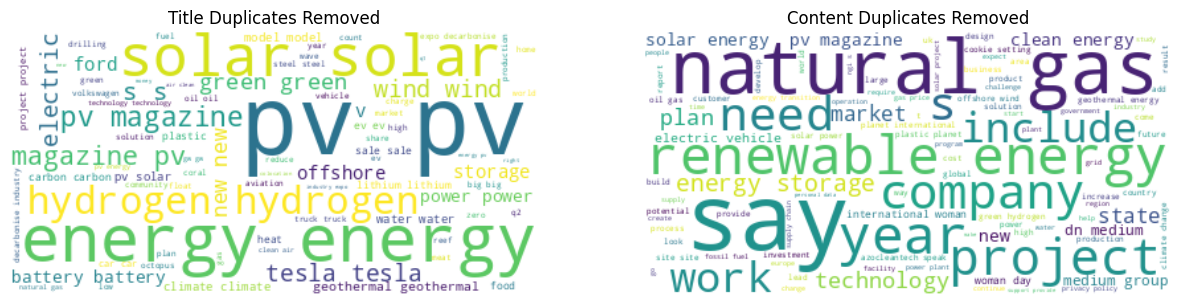

In [ ]:
# creating a work cloud from duplicate words removed after wordtokenization

removed_words_title = df['title_wremoved_words'].str.split().explode().dropna().tolist()
removed_words_content = df['content_wremoved_words'].str.split().explode().dropna().tolist()

# Convert the list of words to a space-separated string
text_title = ' '.join(removed_words_title)
text_content = ' '.join(removed_words_content)

# Generate the word cloud
wordcloud_title = WordCloud(width=400, height=200, background_color='white').generate(text_title)
wordcloud_content = WordCloud(width=400, height=200, background_color='white').generate(text_content)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Display the first word cloud
axs[0].imshow(wordcloud_title, interpolation='bilinear')
axs[0].set_title('Title Duplicates Removed')
axs[0].axis('off')

# Display the second word cloud
axs[1].imshow(wordcloud_content, interpolation='bilinear')
axs[1].set_title('Content Duplicates Removed')
axs[1].axis('off')

# Show the plot
plt.show()


In [ ]:
# Printing duplicate words in two lists
unique_removed_words_title = df['title_wremoved_words'].str.split().explode().dropna().unique().tolist()
unique_removed_words_content = df['content_wremoved_words'].str.split().explode().dropna().unique().tolist()

print(len(unique_removed_words_title), unique_removed_words_title)
print(len(unique_removed_words_content), unique_removed_words_title)

263 ['capture', 'big', 'japan', 'today', 's', 'energy', 'right', 'hydrogen', 'export', 'wind', 'year', '2', 'oil', 'water', 'steel', 'climate', 'carbon', 'solar', 'solution', 'battery', 'net', 'zero', 'offshore', 'sector', 'storage', 'ev', 'charge', 'money', 'cheap', '3', 'car', 'sale', 'q2', 'tesla', 'power', 'green', 'chart', 'hit', '50', 'growth', 'v', 'electric', 'urban', 'truck', 'home', 'well', 'stellantis', 'lucid', 'new', 'ford', '2082', 'fuel', 'trend', 'sport', 'station', 'mw', 'crop', 'lithium', 'model', 'tariff', 'mini', 'need', 'swtch', 'leader', '73', 'invest', 'auto', '490', '69', '554', '2055', '81', '2067', '481', '154', '689', '38', '443', '1551', '1417', '2435', '334', '78', 'esg', '21', '273', '49', 'community', 'world', 'f1', 'electricity', '74', 'cell', 'household', '336', '182', 'heliostat', '83', '127', 'cultural', 'site', '156', '55', 'clean', 'beverly', '1222', '692', '559', '79', '87', '248', '491', '4', '18', 'day', 'expo', 'decarbonise', 'industry', 'restau

In [ ]:
# Finally saving the preprocessed dataframe as 2 versions in a csv file

timestamp = datetime.datetime.now().strftime('%Y%m%d%H%M')

# cleantec_preprocessed_extended.csv: contains all columns created

file_path_extended = str(data_folder)+'/cleantec_preprocessed_extended_'+ timestamp +'.csv'
df.to_csv(file_path_extended, index=False, encoding='utf-8')

# cleantec_preprocessed_final.csv: contains original data + 2 new columns(title_lemmatized_w_unique,content_lemmatized_unique)

#column_names = df.columns.tolist()
#print(column_names)
selected_columns = ['Unnamed: 0', 'title', 'date', 'author', 'content', 'domain', 'url', 'title_lemmatized_w_unique', 'content_lemmatized_w_unique', 'title_lemmatized_s_unique', 'content_lemmatized_s_unique']
final_df = df[selected_columns].copy()
file_path_final = str(data_folder)+'/cleantec_preprocessed_final_'+ timestamp +'.csv'
final_df.to_csv(file_path_final, index=False, encoding='utf-8')

# 2. Part: Explanatory Data Analysis

Deliverables:

*   Compute basic statistics such as word counts, document lengths, and term frequencies.
*   Create word clouds to visualize the most frequent terms.
*   Plot histograms or bar charts to analyze the distribution of major cleantech topics and categories.
*   Identify outliers or anomalies in the data.
*   Visualize the distribution of texts with scatter plots or other suitable visualization techniques.




### 2.1 Setup Import Preprocessed File

In [ ]:
#cleantec_prep = data_folder / "cleantec_preprocessed_extended_202311262250.csv"
cleantec_prep = data_folder / "cleantec_preprocessed_final_202311262250.csv"

In [ ]:
print(data_folder)
print(cleantec_prep)
cleantec_prep

In [ ]:
df = pd.read_csv(cleantec_prep, encoding='utf-8')
df.head()

Unnamed: 0                                              title        date  \
0        1280  qatar to slash emissions as lng expansion adva...  2021-01-13   
1        1281               india launches its first 700 mw phwr  2021-01-15   
2        1283              new chapter for us-china energy trade  2021-01-20   
3        1284  japan: slow restarts cast doubt on 2030 energy...  2021-01-22   
4        1285     nyc pension funds to divest fossil fuel shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["qatar petroleum ( qp) is targeting aggressiv...  energyintel   
1    NaN  ["• nuclear power corp. of india ltd. ( npcil)...  energyintel   
2    NaN  ["new us president joe biden took office this ...  energyintel   
3    NaN  ["the slow pace of japanese reactor restarts c...  energyintel   
4    NaN  ["two of new york city's largest pension funds...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   
1  https://www.energyintel.com/0000017b-a7dc-de4c...   
2  https://www.energyintel.com/0000017b-a7dc-de4c...   
3  https://www.energyintel.com/0000017b-a7dc-de4c...   
4  https://www.energyintel.com/0000017b-a7dc-de4c...   

                         title_lemmatized_w_unique  \
0       expansion slash emission advance qatar lng   
1                         launch 700 india mw phwr   
2                 uschina chapter trade energy new   
3  cast plan slow restarts japan doubt energy 2030   
4        fossil divest fuel fund share pension nyc   

                         content_lemmatized_w_unique  \
0  wellhead ask repeatedly aggressively north 202...   
1  funding lowcarbon north 60 system unit 4 year ...   
2  deal 912 dramatic area temperature 2050 predec...   
3  kariwa7 prefecture kansai fukushima impose spe...   
4  sell conduct strand pressure recent 2040 natur...   

                         title_lemmatized_s_unique  \
0       expansion slash emission advance qatar lng   
1                         launch 700 india mw phwr   
2                 uschina chapter trade energy new   
3  cast plan slow restarts japan doubt energy 2030   
4        fossil divest fuel fund share pension nyc   

                         content_lemmatized_s_unique  
0  1520 wellhead ask repeatedly aggressively nort...  
1  funding lowcarbon north dec 60 system unit 4 y...  
2  deal here dramatic area temperature 2050 prede...  
3  kariwa7 prefecture kansai fukushima impose spe...  
4  sell conduct strand pressure recent 2040 natur...

In [ ]:
df.shape

(9607, 11)

### 2.2 General Overview Word Cloud

The word clouds above provide a comprehensive overview of the most prevalent words and topics found in our lemmatized tokenized text columns. Notably, there is a distinction between the word clouds for titles and content:

In the title word cloud, prominent words include 'energy,' 'new,' 'solar,' and 'small,' along with domain-specific terms like 'renewable,' 'storage,' 'geothermal,' 'power,' 'project,' 'wind,' 'pv,' and 'magazine.'

On the other hand, the content word cloud features more general and less domain-specific terms, such as 'time,' 'view,' 'require,' 'future,' 'process,' 'project,' 'industrial,' 'market,' 'service,' 'industry,' and 'company.'

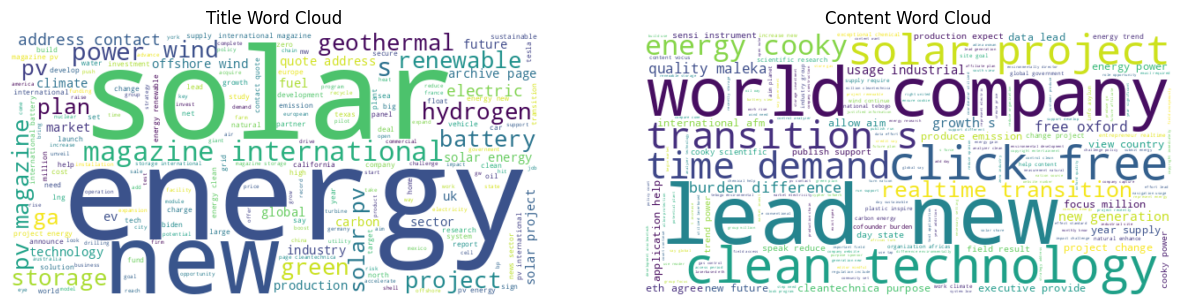

In [ ]:
# creating a world cloud from words at title and content for a first overall overview

words_title = df['title_lemmatized_w_unique'].str.split().explode().dropna().tolist()
words_content = df['content_lemmatized_w_unique'].str.split().explode().dropna().tolist()

# Convert the list of words to a space-separated string
text_title = ' '.join(words_title)
text_content = ' '.join(words_content)

# Generate the word cloud
wordcloud_title = WordCloud(width=600, height=300, background_color='white').generate(text_title)
wordcloud_content = WordCloud(width=600, height=300, background_color='white').generate(text_content)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Display the first word cloud
axs[0].imshow(wordcloud_title, interpolation='bilinear')
axs[0].set_title('Title Word Cloud')
axs[0].axis('off')

# Display the second word cloud
axs[1].imshow(wordcloud_content, interpolation='bilinear')
axs[1].set_title('Content Word Cloud')
axs[1].axis('off')

# Show the plot
plt.show()


In [ ]:
# creating an interactive worldcloud for title

# change data type for date
df['date'] = pd.to_datetime(df['date'])

# Group by year and concatenate words for title
yearly_words_content = df.groupby(df['date'].dt.to_period("Y"))['title_lemmatized_w_unique'].apply(
    lambda x: ' '.join(x.str.split().explode().dropna().tolist()))

# Generate word clouds for each year
wordclouds_content_yearly = [WordCloud(width=800, height=400, background_color='white').generate(text) for text in
                              yearly_words_content]

# Create subplot using plotly
fig = go.Figure()

# Add initial frame
fig.add_trace(go.Image(z=wordclouds_content_yearly[0].to_array(), hoverinfo='skip'))

# Update layout
fig.update_layout(height=600, width=1000, showlegend=False, title_text="Yearly Title Word Clouds", xaxis_title="Date")

# Add frames for each year using a for loop
frames = [go.Frame(data=[go.Image(z=wordcloud.to_array(), hoverinfo='skip')], name=str(year))
          for wordcloud, year in zip(wordclouds_content_yearly, yearly_words_content.index)]

# Assign frames to the figure
fig.frames = frames

# Add slider for date selection
fig.update_layout(
    sliders=[{
        "active": 0,
        "steps": [
            {"args": [[str(year)], {"frame": {"duration": 500, "redraw": True}, "mode": "immediate",
                             "transition": {"duration": 0}}],
             "label": str(year),
             "method": "animate"}
            for year in yearly_words_content.index
        ],
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Year:",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
    }]
)

# Show the plot
fig.show()

In [ ]:
# creating an interactive worldcloud for content

# Group by year and concatenate words for content
yearly_words_content = df.groupby(df['date'].dt.to_period("Y"))['content_lemmatized_w_unique'].apply(
    lambda x: ' '.join(x.str.split().explode().dropna().tolist()))

# Generate word clouds for each year
wordclouds_content_yearly = [WordCloud(width=800, height=400, background_color='white').generate(text) for text in
                              yearly_words_content]

# Create subplot using plotly
fig = go.Figure()

# Add initial frame
fig.add_trace(go.Image(z=wordclouds_content_yearly[0].to_array(), hoverinfo='skip'))

# Update layout
fig.update_layout(height=600, width=1000, showlegend=False, title_text="Yearly Content Word Clouds", xaxis_title="Date")

# Add frames for each year using a for loop
frames = [go.Frame(data=[go.Image(z=wordcloud.to_array(), hoverinfo='skip')], name=str(year))
          for wordcloud, year in zip(wordclouds_content_yearly, yearly_words_content.index)]

# Assign frames to the figure
fig.frames = frames

# Add slider for date selection
fig.update_layout(
    sliders=[{
        "active": 0,
        "steps": [
            {"args": [[str(year)], {"frame": {"duration": 500, "redraw": True}, "mode": "immediate",
                             "transition": {"duration": 0}}],
             "label": str(year),
             "method": "animate"}
            for year in yearly_words_content.index
        ],
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Year:",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
    }]
)

# Show the plot
fig.show()

### 2.3 Compute Basic Statistics Using Pandas

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'date', 'author', 'content', 'domain', 'url',
       'title_lemmatized_w_unique', 'content_lemmatized_w_unique',
       'title_lemmatized_s_unique', 'content_lemmatized_s_unique'],
      dtype='object')


In [ ]:
# Removing unused columns
columns_to_drop = ['Unnamed: 0', 'author','url' ]
df.drop(columns=columns_to_drop, inplace=True)

df.shape

(9607, 8)

In [ ]:
df.head()

title        date  \
0  qatar to slash emissions as lng expansion adva...  2021-01-13   
1               india launches its first 700 mw phwr  2021-01-15   
2              new chapter for us-china energy trade  2021-01-20   
3  japan: slow restarts cast doubt on 2030 energy...  2021-01-22   
4     nyc pension funds to divest fossil fuel shares  2021-01-25   

                                             content       domain  \
0  ["qatar petroleum ( qp) is targeting aggressiv...  energyintel   
1  ["• nuclear power corp. of india ltd. ( npcil)...  energyintel   
2  ["new us president joe biden took office this ...  energyintel   
3  ["the slow pace of japanese reactor restarts c...  energyintel   
4  ["two of new york city's largest pension funds...  energyintel   

                         title_lemmatized_w_unique  \
0       expansion slash emission advance qatar lng   
1                         launch 700 india mw phwr   
2                 uschina chapter trade energy new   
3  cast plan slow restarts japan doubt energy 2030   
4        fossil divest fuel fund share pension nyc   

                         content_lemmatized_w_unique  \
0  wellhead ask repeatedly aggressively north 202...   
1  funding lowcarbon north 60 system unit 4 year ...   
2  deal 912 dramatic area temperature 2050 predec...   
3  kariwa7 prefecture kansai fukushima impose spe...   
4  sell conduct strand pressure recent 2040 natur...   

                         title_lemmatized_s_unique  \
0       expansion slash emission advance qatar lng   
1                         launch 700 india mw phwr   
2                 uschina chapter trade energy new   
3  cast plan slow restarts japan doubt energy 2030   
4        fossil divest fuel fund share pension nyc   

                         content_lemmatized_s_unique  
0  1520 wellhead ask repeatedly aggressively nort...  
1  funding lowcarbon north dec 60 system unit 4 y...  
2  deal here dramatic area temperature 2050 prede...  
3  kariwa7 prefecture kansai fukushima impose spe...  
4  sell conduct strand pressure recent 2040 natur...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   title                        9607 non-null   object
 1   date                         9607 non-null   object
 2   content                      9607 non-null   object
 3   domain                       9607 non-null   object
 4   title_lemmatized_w_unique    9607 non-null   object
 5   content_lemmatized_w_unique  9607 non-null   object
 6   title_lemmatized_s_unique    9607 non-null   object
 7   content_lemmatized_s_unique  9607 non-null   object
dtypes: object(8)
memory usage: 600.6+ KB


Below we are using a simple sentiment library, TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.

In [ ]:
# First start with basic text features tools

# to add the new columns after 'title_lemmatized_unique'
title_position = df.columns.get_loc('title_lemmatized_w_unique') + 1

# Add 'Review lenght'
df['content_review_length'] = df['content_lemmatized_w_unique'].astype(str).apply(len)
df.insert(title_position, 'title_review_length', df['title_lemmatized_w_unique'].astype(str).apply(len))

# Add simple token count
df['content_num_tokens'] = df['content_lemmatized_w_unique'].apply(lambda x: len(str(x).split()))
df.insert(title_position, 'title_num_tokens', df['title_lemmatized_w_unique'].apply(lambda x: len(str(x).split())))

# Add polarity
df['content_polarity'] = df['content_lemmatized_w_unique'].map(lambda text: TextBlob(str(text)).sentiment.polarity)
df.insert(title_position,'title_polarity',df['title_lemmatized_w_unique'].map(lambda text: TextBlob(str(text)).sentiment.polarity))

df.iloc[:, 4:].head(11)

title_lemmatized_w_unique  title_polarity  \
0          expansion slash emission advance qatar lng        0.000000   
1                            launch 700 india mw phwr        0.000000   
2                    uschina chapter trade energy new        0.136364   
3     cast plan slow restarts japan doubt energy 2030       -0.300000   
4           fossil divest fuel fund share pension nyc        0.000000   
5   decide fukushima court liability supreme japan...        0.000000   
6       biden engagement signal progressive appointee        0.000000   
7                          game big great picture new        0.134091   
8           plan hold fukushima japan tritium release        0.000000   
9   state united electrification cold snap highlig...       -0.600000   
10             head retirement kuosheng1 early taiwan        0.100000   

    title_num_tokens  title_review_length  \
0                  6                   42   
1                  5                   24   
2                  5                   32   
3                  8                   47   
4                  7                   41   
5                  7                   53   
6                  5                   45   
7                  5                   26   
8                  6                   41   
9                  7                   54   
10                 5                   38   

                          content_lemmatized_w_unique  \
0   wellhead ask repeatedly aggressively north 202...   
1   funding lowcarbon north 60 system unit 4 year ...   
2   deal 912 dramatic area temperature 2050 predec...   
3   kariwa7 prefecture kansai fukushima impose spe...   
4   sell conduct strand pressure recent 2040 natur...   
5   witness fukushima seek conservative accurate t...   
6   mexico climaterelated natural seek adhere wasn...   
7   america 2050 manufacturing shift initiative fa...   
8   fukushima conservative face 8 agenda systemati...   
9   mile accurate feed face likely campaign indust...   
10  permission chinshan unused office rack 31 admi...   

                            title_lemmatized_s_unique  \
0          expansion slash emission advance qatar lng   
1                            launch 700 india mw phwr   
2                    uschina chapter trade energy new   
3     cast plan slow restarts japan doubt energy 2030   
4           fossil divest fuel fund share pension nyc   
5   decide fukushima court liability supreme japan...   
6       biden engagement signal progressive appointee   
7                          game big great picture new   
8           plan hold fukushima japan tritium release   
9   state united electrification cold snap highlig...   
10             head retirement kuosheng1 early taiwan   

                          content_lemmatized_s_unique  content_review_length  \
0   1520 wellhead ask repeatedly aggressively nort...                   1139   
1   funding lowcarbon north dec 60 system unit 4 y...                   1703   
2   deal here dramatic area temperature 2050 prede...                   1878   
3   kariwa7 prefecture kansai fukushima impose spe...                   2071   
4   sell conduct strand pressure recent 2040 natur...                   1165   
5   witness fukushima seek conservative accurate t...                   2655   
6   mexico climaterelated natural seek adhere dec ...                   1695   
7   america 2050 manufacturing shift initiative fa...                   2943   
8   fukushima conservative face 8 agenda systemati...                   2985   
9   mile accurate feed face likely campaign indust...                   2822   
10  permission chinshan unused office rack 31 admi...                   2539   

    content_num_tokens  content_polarity  
0                  164          0.055480  
1                  233          0.100857  
2                  260         -0.011771  
3                  272         -0.010435  
4                  155         -0.004334  
5                  35

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        9607 non-null   object 
 1   date                         9607 non-null   object 
 2   content                      9607 non-null   object 
 3   domain                       9607 non-null   object 
 4   title_lemmatized_w_unique    9607 non-null   object 
 5   title_polarity               9607 non-null   float64
 6   title_num_tokens             9607 non-null   int64  
 7   title_review_length          9607 non-null   int64  
 8   content_lemmatized_w_unique  9607 non-null   object 
 9   title_lemmatized_s_unique    9607 non-null   object 
 10  content_lemmatized_s_unique  9607 non-null   object 
 11  content_review_length        9607 non-null   int64  
 12  content_num_tokens           9607 non-null   int64  
 13  content_polarity  

In [ ]:
# Exploring the descriptive statistics of the dataframe

df.describe(datetime_is_numeric=True)

title_polarity  title_num_tokens  title_review_length  \
count     9607.000000       9607.000000          9607.000000   
mean         0.033631          7.737171            54.449048   
std          0.154641          2.407855            17.585326   
min         -0.800000          1.000000             5.000000   
25%          0.000000          6.000000            42.000000   
50%          0.000000          8.000000            53.000000   
75%          0.000000          9.000000            66.000000   
max          1.000000         19.000000           152.000000   

       content_review_length  content_num_tokens  content_polarity  
count            9607.000000         9607.000000       9607.000000  
mean             1963.166025          257.750494          0.107226  
std               945.514610          122.920231          0.061030  
min               366.000000           46.000000         -0.200000  
25%              1245.000000          163.000000          0.068845  
50%              1758.000000          232.000000          0.105465  
75%              2481.000000          326.000000          0.143997  
max              7318.000000          884.000000          0.412500

The above statisttics showes the following for the numeric columns:

*   **count**: number of values in the dataset
*   **mean**: the average of the values in the dataset
*   **std**: the standard deviation of the values
*   **min**: the smallest value
*   **25%**: the value at the 25% percentile
*   **50%**: the value at the 50% percentile
*   **75%**: the value at the 75% percentile
*   **max**: the largest value

**Main Findings on Content Polarity Distribution:**

*   The mean values of content polarity in both the title and content columns are slightly positive, indicating a generally neutral sentiment.

*   The distribution of title polarity is right-skewed, suggesting a prevalence of positive sentiments. In contrast, content polarity follows a more symmetrical, normal distribution.

*   Title polarity values exhibit a broader range between -0.8 and +1, resulting in more outliers in both positive and negative directions.

*   Content polarity values demonstrate smaller variation, confined within the range of -0.2 to +0.4, reflecting a more concentrated distribution around the mean.

These observations provide a nuanced understanding of the polarity dynamics within the content, highlighting differences between titles and content in sentiment expression and variability.

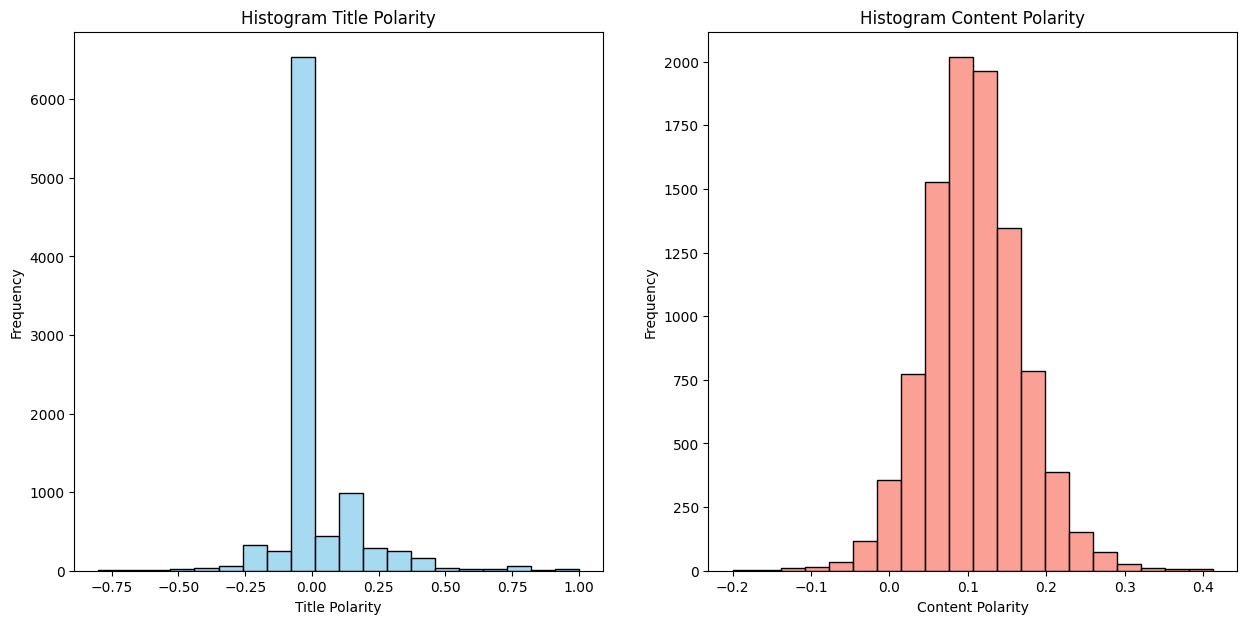

In [ ]:
# ploting title and content polarity distribution

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Create the first histogram
sns.histplot(df["title_polarity"], bins=20, kde=False, color="skyblue", ax=axs[0])
axs[0].set_title("Histogram Title Polarity")
axs[0].set_xlabel("Title Polarity")
axs[0].set_ylabel("Frequency")

# Create the second histogram
sns.histplot(df["content_polarity"], bins=20, kde=False, color="salmon", ax=axs[1])
axs[1].set_title("Histogram Content Polarity")
axs[1].set_xlabel("Content Polarity")
axs[1].set_ylabel("Frequency")

plt.show()

**Main Findings on Publication Date and Average Polarity:**

*   The dataset spans from January 2021 to December 2023, capturing a diverse range of inputs.

*   A notable peak in activity is observed between February and May 2023, suggesting a concentrated period of publication.

*   When examining the monthly average polarity, a distinctive pattern emerges. The distribution in content polarity appears more evenly spread across months. In contrast, the average title polarity exhibits greater variability, indicating fluctuations in sentiment over time.

These insights provide a nuanced understanding of the temporal aspects and sentiment dynamics within the dataset.

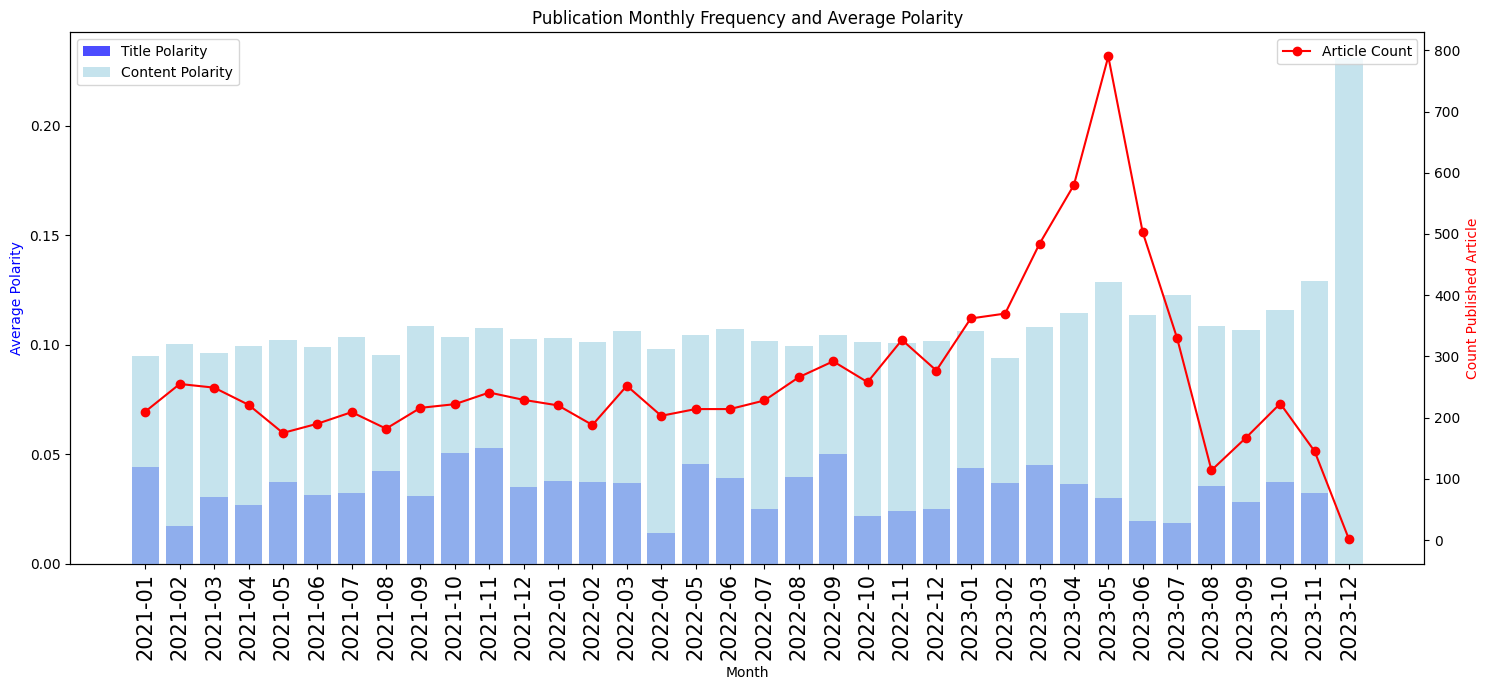

In [ ]:
# plotting dualchart date and title polarity

df_dual = df[['date','title_polarity', 'content_polarity']]
#df_dual.head()

# Group by month and calculate mean polarity for each month for content
monthly_content_polarity = df.groupby(df['date'].dt.to_period("M"))['content_polarity'].mean()

# Create DataFrames
# Create DataFrames
monthly_df_counts = pd.DataFrame({'Count': df_dual.groupby(df_dual['date'].dt.to_period("M")).size()}, index=df_dual.groupby(df_dual['date'].dt.to_period("M")).size().index)
monthly_df_polarity = pd.DataFrame({'Polarity': df_dual.groupby(df_dual['date'].dt.to_period("M"))['title_polarity'].mean()}, index=df_dual.groupby(df_dual['date'].dt.to_period("M"))['title_polarity'].mean().index)
monthly_df_content_polarity = pd.DataFrame({'Content_Polarity': monthly_content_polarity.values}, index=monthly_content_polarity.index)

# Convert the period index to string for both DataFrames
monthly_df_counts.index = monthly_df_counts.index.astype(str)
monthly_df_polarity.index = monthly_df_polarity.index.astype(str)
monthly_df_content_polarity.index = monthly_df_content_polarity.index.astype(str)

# Plotting both charts in the same plot
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar plot for Average Polarity on the left y-axis
ax1.bar(monthly_df_polarity.index, monthly_df_polarity['Polarity'], color='blue', alpha=0.7, zorder=10, label='Title Polarity')
ax1.set_title('Publication Monthly Frequency and Average Polarity')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Polarity', color='blue')
ax1.tick_params(axis='x', rotation=90, labelcolor='black', labelsize=15)

# Bar plot for Average Polarity on the left y-axis
ax1.bar(monthly_df_content_polarity.index, monthly_df_content_polarity['Content_Polarity'], color='lightblue', alpha=0.7, zorder=10, label='Content Polarity')

# Create a secondary y-axis for title frequency on the right
ax2 = ax1.twinx()
ax2.plot(monthly_df_counts.index, monthly_df_counts['Count'], marker='o', linestyle='-', color='red', label='Article Count')
ax2.set_ylabel('Count Published Article', color='red')

# Display legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


In addition, our key insights are succinctly portrayed in the matrix scatterplot, providing a static yet insightful representation of our data.

**Key Findings:**

**1. Content:**

Longer content reviews tend to exhibit a neutral sentiment on average.
Reviews with extreme positive or negative sentiments are generally shorter.
A similar trend is observed when comparing the number of tokens with polarity.

**2. Title:**

Title length demonstrates a more neutral distribution across shorter and longer lengths.
Extreme positive and negative sentiments are often associated with average title lengths.
A parallel trend is noticeable when examining the relationship between polarity and the number of tokens.

Finally the interactive 3D charts below offer a comprehensive view of individual data points, showcasing normalized scales of polarity, number of tokens, and review length.

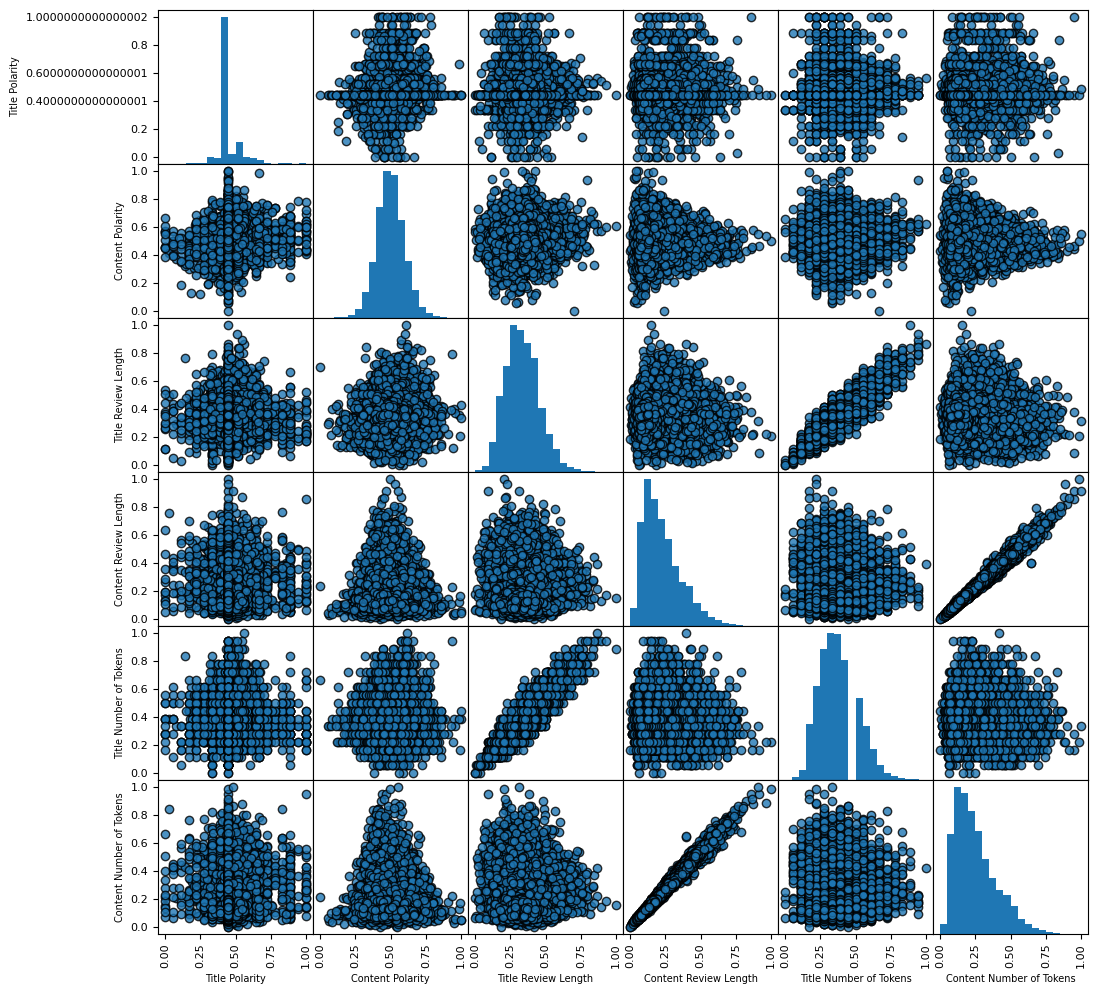

In [ ]:
# Normalizing nummeric variables before creating the matrix plot
scaler = MinMaxScaler()
normalized_polarity = scaler.fit_transform(df[['title_polarity','content_polarity', 'title_review_length','content_review_length', 'title_num_tokens', 'content_num_tokens']])

# Create a new DataFrame with normalized values
df_normalized = pd.DataFrame(normalized_polarity, columns=['Title Polarity','Content Polarity', 'Title Review Length','Content Review Length','Title Number of Tokens', 'Content Number of Tokens'])

# Set the font size for all plots
plt.rcParams.update({'font.size': 7})

pd.plotting.scatter_matrix(
    df_normalized.select_dtypes(include='number').iloc[:],
    figsize=(12,12),
    alpha=0.8,
    diagonal='hist',
    grid=True,
    marker='o',
    edgecolor='k',
    range_padding=0.1,
    hist_kwds={'bins': 20},
);


In [ ]:
# Normalizing numeric variables before creating the matrix plot
scaler = MinMaxScaler()
normalized_polarity = scaler.fit_transform(df[['title_polarity', 'content_polarity', 'title_review_length', 'content_review_length', 'title_num_tokens', 'content_num_tokens']])

# Create a new DataFrame with normalized values
df_normalized = pd.DataFrame(normalized_polarity, columns=['Title Polarity', 'Content Polarity', 'Title Review Length', 'Content Review Length', 'Title Number of Tokens', 'Content Number of Tokens'])

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Title Chart', 'Content Chart'), specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

# Add trace for the first chart (Title)
trace_title = go.Scatter3d(
    x=df_normalized['Title Review Length'],
    y=df_normalized['Title Number of Tokens'],
    z=df_normalized['Title Polarity'],
    mode='markers',
    marker=dict(color=df_normalized['Title Polarity'], colorscale='Viridis'),
    name='Title Chart'
)

# Add trace for the second chart (Content)
trace_content = go.Scatter3d(
    x=df_normalized['Content Review Length'],
    y=df_normalized['Content Number of Tokens'],
    z=df_normalized['Content Polarity'],
    mode='markers',
    marker=dict(color=df_normalized['Content Polarity'], colorscale='Viridis'),
    name='Content Chart'
)

# Add traces to the subplots
fig.add_trace(trace_title, row=1, col=1)
fig.add_trace(trace_content, row=1, col=2)

# Update layout
fig.update_layout(scene=dict(aspectmode='cube',xaxis_title='Review Length', yaxis_title='Number of Tokens', zaxis_title='Polarity'),
                  scene2=dict(aspectmode='cube', xaxis_title='Review Length', yaxis_title='Number of Tokens', zaxis_title='Polarity'))

# Show the plot
fig.show()

### 2.4 Unigrams Text analysis

N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase. In order to do this, we use scikit-learn’s CountVectorizer function.

In [ ]:
# creating unigrams with a function to get the top words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#common_words = get_top_n_words(df['title_lemmatized_w_unique'], 20)
common_words_title_w_lemm = get_top_n_words(df['title_lemmatized_w_unique'], 20)
common_words_title_s_lemm = get_top_n_words(df['title_lemmatized_s_unique'], 20)
common_words_content_w_lemm = get_top_n_words(df['content_lemmatized_w_unique'], 20)
common_words_content_s_lemm = get_top_n_words(df['content_lemmatized_s_unique'], 20)

# Convert lists to DataFrames
df_title_w_lemm = pd.DataFrame(common_words_title_w_lemm, columns=['word_title_w_lemm', 'count_title_w_lemm'])
df_title_s_lemm = pd.DataFrame(common_words_title_s_lemm, columns=['word_title_s_lemm', 'count_title_s_lemm'])
df_content_w_lemm = pd.DataFrame(common_words_content_w_lemm, columns=['word_content_w_lemm', 'count_content_w_lemm'])
df_content_s_lemm = pd.DataFrame(common_words_content_s_lemm, columns=['word_content_s_lemm', 'count_content_s_lemm'])

# Merge DataFrames
unigrams = pd.concat([df_title_w_lemm, df_title_s_lemm, df_content_w_lemm, df_content_s_lemm], axis=1)

# Fill NaN values with 0
unigrams = unigrams.fillna(0)

# Display the merged DataFrame
unigrams.head(20)


word_title_w_lemm  count_title_w_lemm word_title_s_lemm  \
0             energy                1702            energy   
1              solar                1604             solar   
2                 pv                1295                pv   
3      international                1246     international   
4           magazine                1214          magazine   
5                new                 719               new   
6            project                 643           project   
7         geothermal                 609        geothermal   
8              power                 565             power   
9               wind                 524              wind   
10           storage                 498           storage   
11               gas                 482               gas   
12             green                 451             green   
13          hydrogen                 446          hydrogen   
14           battery                 443           battery   
15              page                 406              page   
16           address                 375           address   
17           contact                 363           contact   
18             quote                 362             quote   
19           natural                 342           natural   

    count_title_s_lemm word_content_w_lemm  count_content_w_lemm  \
0                 1702              energy                  8526   
1                 1604             company                  6789   
2                 1295                 new                  6638   
3                 1246             project                  6489   
4                 1214                year                  6344   
5                  719                 say                  6199   
6                  643          technology                  5946   
7                  609             content                  5735   
8                  567               power                  5707   
9                  524                help                  5539   
10                 498                site                  5477   
11                 482             provide                  5245   
12                 451             support                  5236   
13                 446            industry                  5140   
14                 442                 use                  5118   
15                 406             include                  5077   
16                 375               solar                  5020   
17                 363         development                  5020   
18                 362               world                  4837   
19                 342               clean                  4817   

   word_content_s_lemm  count_content_s_lemm  
0               energy                  8526  
1                  the                  8466  
2              company                  6789  
3                  new                  6640  
4              project                  6490  
5                 year                  6346  
6                  say                  6232  
7           technology                  5944  
8              content                  5735  
9                power                  5707  
10                help                  5538  
11                site                  5475  
12             provide                  5246  
13             support                  5238  
14                 use                  5174  
15            industry                  5140  
16             include                  5076  
17               solar                  5020  
18         development                  5020  
19               world                  4835

The table and the accompanying bar chart above reveal minimal differences between the tokenized word and sentence columns. Both categories, encompassing titles and content, exhibit a strikingly similar ranking of words.

The bar chart displays the unigram of lemmatized words, providing insights into the most common words in various aspects of the dataset. In all categories the most frequent word is 'energy' indicating the sector of cleantec. In the title as we could see in the world cloud already the words 'solar,' and 'pv' are prevalent, indicating a focus on topics related to energy and solar technologies.
The Content categories show a broader range of terms, with 'company,' and 'project' dominating, suggesting a diverse set of content topics. Notably, the chart reveals the significance of terms such as 'new,' 'technology,' and 'year' across content columns, indicating recurring themes in the dataset.

The variations in word frequencies between title and content columns provide valuable insights into the dataset's content composition and emphasis on specific topics.

In [ ]:
# we plot the unigrams results

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=['Title Word Tokenized', 'Title Sentence Tokenized', 'Content Word Tokenized', 'Content Sentence Tokenized'])

# Plot Title w Lemm
fig.add_trace(go.Bar(x=unigrams['word_title_w_lemm'], y=unigrams['count_title_w_lemm']),
              row=1, col=1)

# Plot Title s Lemm
fig.add_trace(go.Bar(x=unigrams['word_title_s_lemm'], y=unigrams['count_title_s_lemm']),
              row=1, col=2)

# Plot Content w Lemm
fig.add_trace(go.Bar(x=unigrams['word_content_w_lemm'], y=unigrams['count_content_w_lemm']),
              row=2, col=1)

# Plot Content s Lemm
fig.add_trace(go.Bar(x=unigrams['word_content_s_lemm'], y=unigrams['count_content_s_lemm']),
              row=2, col=2)

# Update layout
fig.update_layout(height=600, width=800, showlegend=False, title_text="Word Unigramms")

# Show the plot
fig.show()

In [ ]:
# creating bigramms with a function

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#common_words = get_top_n_words(df['title_lemmatized_w_unique'], 20)
common_words_title_w_lemm = get_top_n_bigram(df['title_lemmatized_w_unique'], 20)
common_words_title_s_lemm = get_top_n_bigram(df['title_lemmatized_s_unique'], 20)
common_words_content_w_lemm = get_top_n_bigram(df['content_lemmatized_w_unique'], 20)
common_words_content_s_lemm = get_top_n_bigram(df['content_lemmatized_s_unique'], 20)

# Convert lists to DataFrames
df_title_w_lemm = pd.DataFrame(common_words_title_w_lemm, columns=['word_title_w_lemm', 'count_title_w_lemm'])
df_title_s_lemm = pd.DataFrame(common_words_title_s_lemm, columns=['word_title_s_lemm', 'count_title_s_lemm'])
df_content_w_lemm = pd.DataFrame(common_words_content_w_lemm, columns=['word_content_w_lemm', 'count_content_w_lemm'])
df_content_s_lemm = pd.DataFrame(common_words_content_s_lemm, columns=['word_content_s_lemm', 'count_content_s_lemm'])

# Merge DataFrames on the 'Word_' columns
bigrams = pd.concat([df_title_w_lemm, df_title_s_lemm, df_content_w_lemm, df_content_s_lemm], axis=1)

# Fill NaN values with 0
bigrams = bigrams.fillna(0)

# Display the merged DataFrame
bigrams.head(20)


word_title_w_lemm  count_title_w_lemm       word_title_s_lemm  \
0              pv magazine                 274             pv magazine   
1                 solar pv                 252                solar pv   
2          address contact                 231         address contact   
3            quote address                 203           quote address   
4            offshore wind                 181           offshore wind   
5            solar project                 164           solar project   
6             archive page                 157            archive page   
7             solar energy                 152            solar energy   
8   international magazine                 146  international magazine   
9              energy news                 102             energy news   
10          project energy                  96             magazine pv   
11             magazine pv                  96          project energy   
12             news sector                  95             news sector   
13               pv energy                  85               pv energy   
14            energy clean                  84            energy clean   
15        energy renewable                  84        energy renewable   
16           contact quote                  82   international battery   
17   international battery                  79           contact quote   
18        magazine storage                  66        magazine storage   
19            energy power                  49            energy power   

    count_title_s_lemm    word_content_w_lemm  count_content_w_lemm  \
0                  280               lead new                  2163   
1                  257          world company                  2129   
2                  236       clean technology                  1800   
3                  207             click free                  1634   
4                  180          solar project                  1613   
5                  162            time demand                  1557   
6                  157    realtime transition                  1412   
7                  152           energy cooky                  1355   
8                  144      burden difference                  1284   
9                  101            free oxford                  1142   
10                  97         quality maleka                  1134   
11                  96        2023 technology                  1117   
12                  94         new generation                  1114   
13                  84       usage industrial                  1110   
14                  83  cleantechnica purpose                  1087   
15                  82           view country                  1037   
16                  79             new future                  1036   
17                  75            year supply                  1023   
18                  66          focus million                  1011   
19                  49      executive provide                  1008   

      word_content_s_lemm  count_content_s_lemm  
0           world company                  2184  
1                lead new                  2183  
2        clean technology                  1706  
3              click free                  1634  
4             time demand                  1559  
5           solar project                  1548  
6     realtime transition                  1425  
7            energy cooky                  1311  
8       burden difference                  1294  
9         2023 technology                  1186  
10            free oxford                  1177  
11         quality maleka                  1150  
12  cleantechnica purpose                  1135  
13         new generation                  1116  
14       usage industrial                  1108  
15             new future                  1083  
16           view country                  1043  
17          focus million                  1029  
18         p

The analysis of bigrams reveals a more noticeable distinction between word and sentence tokenized categories. Both the table and the accompanying chart illustrate distinct word combinations within each category.

Moreover, the frequency count experiences a significant decrease, a trend that is clearly evident in both the tabular representation and the bar plot. This suggests a broader range of unique bigrams in the initial stages of tokenization, gradually diminishing in frequency as we move through the dataset.

In [ ]:
# we plot the bigrams results

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=['Title Word Tokenized', 'Title Sentence Tokenized', 'Content Word Tokenized', 'Content Sentence Tokenized'])

# Plot Title w Lemm
fig.add_trace(go.Bar(x=bigrams['word_title_w_lemm'], y=bigrams['count_title_w_lemm']),
              row=1, col=1)

# Plot Title s Lemm
fig.add_trace(go.Bar(x=bigrams['word_title_s_lemm'], y=bigrams['count_title_s_lemm']),
              row=1, col=2)

# Plot Content w Lemm
fig.add_trace(go.Bar(x=bigrams['word_content_w_lemm'], y=bigrams['count_content_w_lemm']),
              row=2, col=1)

# Plot Content s Lemm
fig.add_trace(go.Bar(x=bigrams['word_content_s_lemm'], y=bigrams['count_content_s_lemm']),
              row=2, col=2)

# Update layout
fig.update_layout(height=1000, width=1000, showlegend=False, title_text="Word Bigramms")

# Show the plot
fig.show()

In [ ]:
# Finally creating trigramms with a function

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#common_words = get_top_n_words(df['title_lemmatized_w_unique'], 20)
common_words_title_w_lemm = get_top_n_trigram(df['title_lemmatized_w_unique'], 20)
common_words_title_s_lemm = get_top_n_trigram(df['title_lemmatized_s_unique'], 20)
common_words_content_w_lemm = get_top_n_trigram(df['content_lemmatized_w_unique'], 20)
common_words_content_s_lemm = get_top_n_trigram(df['content_lemmatized_s_unique'], 20)

# Convert lists to DataFrames
df_title_w_lemm = pd.DataFrame(common_words_title_w_lemm, columns=['word_title_w_lemm', 'count_title_w_lemm'])
df_title_s_lemm = pd.DataFrame(common_words_title_s_lemm, columns=['word_title_s_lemm', 'count_title_s_lemm'])
df_content_w_lemm = pd.DataFrame(common_words_content_w_lemm, columns=['word_content_w_lemm', 'count_content_w_lemm'])
df_content_s_lemm = pd.DataFrame(common_words_content_s_lemm, columns=['word_content_s_lemm', 'count_content_s_lemm'])

# Merge DataFrames on the 'Word_' columns
trigrams = pd.concat([df_title_w_lemm, df_title_s_lemm, df_content_w_lemm, df_content_s_lemm], axis=1)

# Fill NaN values with 0
trigrams = trigrams.fillna(0)

# Display the merged DataFrame
trigrams.head(20)


word_title_w_lemm  count_title_w_lemm          word_title_s_lemm  \
0       quote address contact                 137      quote address contact   
1          energy news sector                  58         energy news sector   
2           solar pv magazine                  47          solar pv magazine   
3   international magazine pv                  33  international magazine pv   
4       address contact quote                  32       solar project energy   
5        solar project energy                  30     address contact energy   
6      address contact energy                  28      address contact quote   
7          pv energy magazine                  27         pv energy magazine   
8             solar pv energy                  21      international page pv   
9       international page pv                  20            solar pv energy   
10    archive page efficiency                  16    archive page efficiency   
11        archive report page                  16        archive report page   
12           pv cell magazine                  16           pv cell magazine   
13          pv solar magazine                  16            read weekend pv   
14            read weekend pv                  16    solar project community   
15  report page cleantechnica                  15  report page cleantechnica   
16    solar project community                  14          pv solar magazine   
17          archive page wind                  14          archive page wind   
18    energy magazine storage                  14    energy magazine storage   
19  international pv magazine                  14  international pv magazine   

    count_title_s_lemm                word_content_w_lemm  \
0                  144                  click free oxford   
1                   57   entrepreneur realtime transition   
2                   52        cofounder burden difference   
3                   33                 energy cooky power   
4                   30                   allow aim planet   
5                   29                      data lead new   
6                   27          analyzer clean technology   
7                   27  burden difference environmentally   
8                   20                lead new generation   
9                   20      million cleantechnica purpose   
10                  16          exceptional chemical help   
11                  16        navigation usage industrial   
12                  16   realtime transition entrepreneur   
13                  16                 help content vocus   
14                  15                    effort lead new   
15                  15    coordinator utilized laserbased   
16                  15               laserbased eth agree   
17                  14                   unido click free   
18                  14              chemical help content   
19                  14              tool application help   

    count_content_w_lemm                word_content_s_lemm  \
0                   1139                  click free oxford   
1                    729   entrepreneur realtime transition   
2                    646        cofounder burden difference   
3                    615                 energy cooky power   
4                    613                   allow aim planet   
5                    558                      data lead new   
6                    489      million cleantechnica purpose   
7                    487                lead new generation   
8                    486  burden difference environmentally   
9                    470          analyzer clean technology   
10                   462          exceptional chemical help   
11                   446   realtime transition entrepreneur   
12                   438                    effort lead new   
13                   433                 help content vocus   
14                   427               laserbased eth agree   
15                   415    coordinator u

Employing trigrams reveals a continued decline in the frequency of word trios. Notably, the significance of the primary word combinations undergoes a complete transformation compared to unigrams and bigrams. Yet, it's worth observing that the semantic context of the words also evolves, adopting a broader scope and becoming less confined to specific domains.

In [ ]:
# we plot the trigrams results

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=['Title Word Tokenized', 'Title Sentence Tokenized', 'Content Word Tokenized', 'Content Sentence Tokenized'])

# Plot Title w Lemm
fig.add_trace(go.Bar(x=trigrams['word_title_w_lemm'], y=trigrams['count_title_w_lemm']),
              row=1, col=1)

# Plot Title s Lemm
fig.add_trace(go.Bar(x=trigrams['word_title_s_lemm'], y=trigrams['count_title_s_lemm']),
              row=1, col=2)

# Plot Content w Lemm
fig.add_trace(go.Bar(x=trigrams['word_content_w_lemm'], y=trigrams['count_content_w_lemm']),
              row=2, col=1)

# Plot Content s Lemm
fig.add_trace(go.Bar(x=trigrams['word_content_s_lemm'], y=trigrams['count_content_s_lemm']),
              row=2, col=2)

# Update layout
fig.update_layout(height=1200, width=1000, showlegend=False, title_text="Word Trigramms")

# Show the plot
fig.show()